In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [43]:
data = pd.read_csv('Food_Inspections.csv')


In [44]:
data.head()

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,2079132,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517328.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,NaN,41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
1,2079129,JET'S PIZZA,JET'S PIZZA,2522268.0,Restaurant,Risk 2 (Medium),1025 W MADISON ST,CHICAGO,IL,60607.0,08/28/2017,License,Not Ready,NaN,41.881572,-87.653052,"(41.88157249576794, -87.65305233593274)"
2,2079125,ROOM 1520,ROOM 1520,2446638.0,Special Event,Risk 3 (Low),301 N JUSTINE ST,CHICAGO,IL,60607.0,08/28/2017,License Re-Inspection,Not Ready,8. SANITIZING RINSE FOR EQUIPMENT AND UTENSILS...,41.886577,-87.665328,"(41.88657652150854, -87.66532812140231)"
3,2079123,MARRIOT MARQUIS CHICAGO,MARRIOT MARQUIS CHICAGO,2517338.0,Restaurant,Risk 1 (High),2121 S PRAIRIE AVE,CHICAGO,IL,60616.0,08/28/2017,License,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.853651,-87.620534,"(41.853650885040594, -87.62053358114167)"
4,2079105,CHARTWELLS,CICS WEST BELDEN CAMPUS,2549079.0,CHARTER SCHOOL,Risk 1 (High),2245 N MCVICKER AVE,CHICAGO,IL,60639.0,08/28/2017,License Re-Inspection,Pass,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.921675,-87.776711,"(41.921675488910864, -87.7767113569357)"


In [45]:
data.describe()


,Inspection ID,License #,Zip,Latitude,Longitude
count,1.538100e+05,1.537950e+05,153712.000000,153266.000000,153266.000000
mean,1.238655e+06,1.517483e+06,60629.004795,41.879852,-87.676471
std,5.582027e+05,8.799955e+05,22.605480,0.081235,0.058835
min,4.424700e+04,0.000000e+00,60007.000000,41.644670,-87.914428
25%,6.643452e+05,1.139359e+06,60614.000000,41.829990,-87.708000
50%,1.361446e+06,1.914680e+06,60625.000000,41.891405,-87.666901
75%,1.578391e+06,2.153526e+06,60643.000000,41.939409,-87.634603
max,2.079219e+06,9.999999e+06,60827.000000,42.021064,-87.525094


In [46]:
len(data)

153810

There are 30798 empty cells in Violations column


Text(0.5, 1.0, 'counts of missing value')

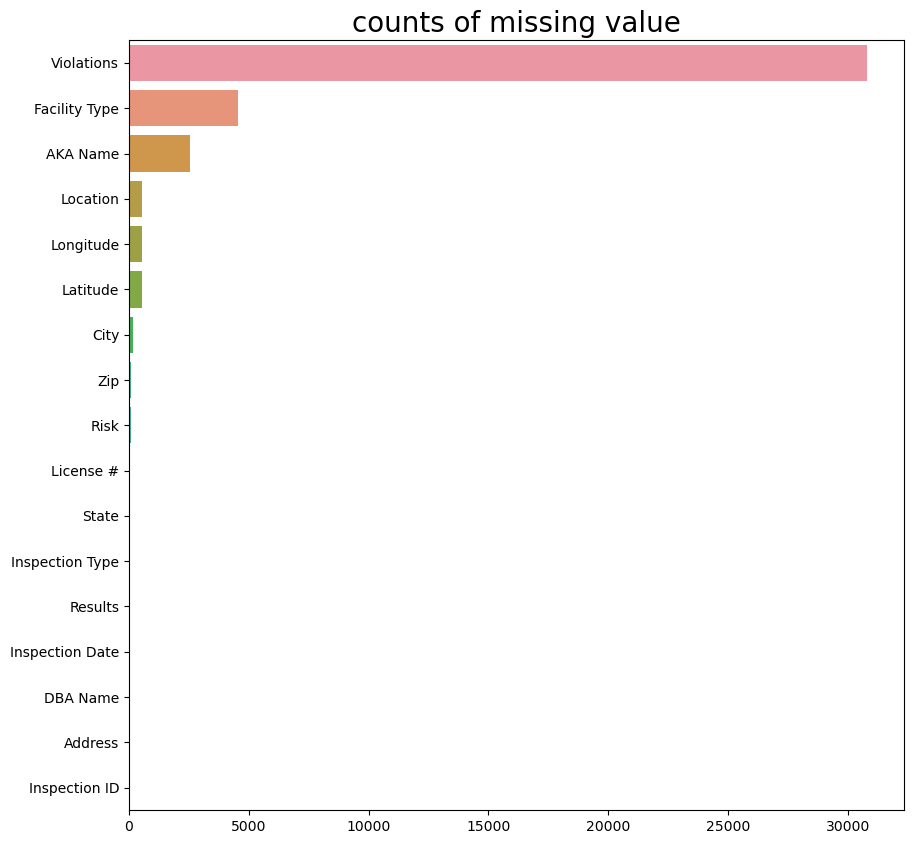

In [25]:

num_empty_cells = data['Violations'].isnull().sum()
print(f'There are {num_empty_cells} empty cells in Violations column')
plt.figure(figsize=(10,10))
sns.barplot(x=data.isnull().sum().sort_values(ascending=False),y=data.isnull().sum().sort_values(ascending=False).index)
plt.title("counts of missing value",size=20)

In [23]:
num_zero_cells = (data['License #'] == 0).sum()
print(f'There are {num_zero_cells} cells with value 0 in License #. Cleaning is needed here!')

There are 439 cells with value 0 in License #. Cleaning is needed here!


In [24]:
num_distinct_values = data['License #'].nunique()
print(f'There are {num_distinct_values} distinct values in License #. Meaning that many location had multiple inspections')

There are 32850 distinct values in License #. Meaning that many location had multiple inspections


In [41]:
distinct_values = data['Facility Type'].unique()
string_values = [val for val in distinct_values if isinstance(val, str)]
sorted_string_values = sorted(string_values)

for value in sorted_string_values:
    print(value)

(convenience store)
(gas station)
1005 NURSING HOME
1023
1023 CHILDERN'S SERVICE FACILITY
1023 CHILDERN'S SERVICE S FACILITY
1023 CHILDERN'S SERVICES FACILITY
1023 CHILDREN'S SERVICES FACILITY
1023-CHILDREN'S SERVICES FACILITY
1584-DAY CARE ABOVE 2 YEARS
A-Not-For-Profit Chef Training Program
AFTER SCHOOL CARE
AFTER SCHOOL PROGRAM
ALTERNATIVE SCHOOL
ART GALLERY
ART GALLERY W/WINE AND BEER
ASSISSTED LIVING
ASSISTED LIVING
Adult Family Care Center
Airport Lounge
Animal Shelter Cafe Permit
Assisted Living
BAKERY/ RESTAURANT
BAKERY/DELI
BAKERY/GROCERY
BAKERY/RESTAURANT
BANQUET
BANQUET FACILITY
BANQUET HALL
BANQUET ROOM
BAR
BAR/GRILL
BEFORE AND AFTER SCHOOL PROGRAM
BEVERAGE/SILVERWARE WAREHOUSE
BOOK STORE
BOWLING LANES/BANQUETS
BOYS AND GIRLS CLUB
BREWERY
BREWPUB
Bakery
Banquet
Banquet Dining
Banquet Hall
Banquet rooms
Banquet/kitchen
CAFE
CAFE/STORE
CAFETERIA
CANDY MAKER
CANDY SHOP
CANDY STORE
CANDY/GELATO
CAR WASH
CAT/LIQUOR
CATERED EVENTS
CATERING/CAFE
CELL PHONE STORE
CHARITY AID KITCHE